In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('dataImages.csv', sep=',')

In [3]:
df

,Unnamed: 0,NameImage,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL,POL,COL,...,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,0,045.png,255,490,950,904,1563,"7,92","2,19","4,23",...,NaN,NaN,2,63,72,69,35,78,37,34
1,1,049.png,255,485,736,866,1312,"6,49","1,94","4,03",...,NaN,NaN,4,64,65,66,35,76,40,31
2,2,059.png,255,513,577,1063,1318,"7,32","2,22","4,69",...,NaN,NaN,3,64,74,78,50,85,41,28
3,3,054.png,255,387,643,812,1137,"7,27","2,03","4,02",...,NaN,NaN,2,62,69,62,38,79,29,24
4,4,057.png,255,425,572,907,1183,"8,12","2,12","4,12",...,NaN,NaN,2,70,73,72,39,79,34,33
5,5,048.png,255,438,1052,1043,1745,"10,13","2,31","4,75",...,NaN,NaN,2,66,73,72,36,85,42,36
6,6,050.png,255,447,261,826,850,"7,83","2,23","4,05",...,NaN,NaN,3,67,60,61,31,72,30,30
7,7,056.png,255,433,784,948,1412,"9,56","2,24","4,65",...,NaN,NaN,4,73,68,67,35,83,37,32
8,8,060.png,255,500,539,927,1168,"8,5","2,26","4,14",...,NaN,NaN,3,69,81,81,45,90,42,36
9,9,046.png,255,501,1017,936,1654,"6,62","1,85","3,73",...,NaN,NaN,3,61,68,70,36,77,35,34


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('NameImage', axis=1)
df = df.drop('PESOABATE', axis=1)
df = df.drop('RC', axis=1)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL,POL,COL,EGS,ECC,PESOVIVO,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,255,490,950,904,1563,"7,92","2,19","4,23","2,23","2,5","30,35",2,63,72,69,35,78,37,34
1,255,485,736,866,1312,"6,49","1,94","4,03","2,4","2,5","28,7",4,64,65,66,35,76,40,31
2,255,513,577,1063,1318,"7,32","2,22","4,69","2,41",2,"42,7",3,64,74,78,50,85,41,28
3,255,387,643,812,1137,"7,27","2,03","4,02","4,07",3,"34,8",2,62,69,62,38,79,29,24
4,255,425,572,907,1183,"8,12","2,12","4,12","1,12","2,5","38,1",2,70,73,72,39,79,34,33
5,255,438,1052,1043,1745,"10,13","2,31","4,75","1,86",3,"42,8",2,66,73,72,36,85,42,36
6,255,447,261,826,850,"7,83","2,23","4,05","1,87","2,5","33,4",3,67,60,61,31,72,30,30
7,255,433,784,948,1412,"9,56","2,24","4,65","3,33","3,5","43,2",4,73,68,67,35,83,37,32
8,255,500,539,927,1168,"8,5","2,26","4,14","1,7",3,"50,2",3,69,81,81,45,90,42,36
9,255,501,1017,936,1654,"6,62","1,85","3,73","1,41","2,5","30,5",3,61,68,70,36,77,35,34


In [5]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL,POL,COL,EGS,ECC,PESOVIVO,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,255.0,490.0,950.0,904.0,1563.0,7.92,2.19,4.23,2.23,2.5,30.35,2.0,63.0,72.0,69.0,35.0,78.0,37.0,34.0
1,255.0,485.0,736.0,866.0,1312.0,6.49,1.94,4.03,2.40,2.5,28.70,4.0,64.0,65.0,66.0,35.0,76.0,40.0,31.0
2,255.0,513.0,577.0,1063.0,1318.0,7.32,2.22,4.69,2.41,2.0,42.70,3.0,64.0,74.0,78.0,50.0,85.0,41.0,28.0
3,255.0,387.0,643.0,812.0,1137.0,7.27,2.03,4.02,4.07,3.0,34.80,2.0,62.0,69.0,62.0,38.0,79.0,29.0,24.0
4,255.0,425.0,572.0,907.0,1183.0,8.12,2.12,4.12,1.12,2.5,38.10,2.0,70.0,73.0,72.0,39.0,79.0,34.0,33.0
5,255.0,438.0,1052.0,1043.0,1745.0,10.13,2.31,4.75,1.86,3.0,42.80,2.0,66.0,73.0,72.0,36.0,85.0,42.0,36.0
6,255.0,447.0,261.0,826.0,850.0,7.83,2.23,4.05,1.87,2.5,33.40,3.0,67.0,60.0,61.0,31.0,72.0,30.0,30.0
7,255.0,433.0,784.0,948.0,1412.0,9.56,2.24,4.65,3.33,3.5,43.20,4.0,73.0,68.0,67.0,35.0,83.0,37.0,32.0
8,255.0,500.0,539.0,927.0,1168.0,8.50,2.26,4.14,1.70,3.0,50.20,3.0,69.0,81.0,81.0,45.0,90.0,42.0,36.0
9,255.0,501.0,1017.0,936.0,1654.0,6.62,1.85,3.73,1.41,2.5,30.50,3.0,61.0,68.0,70.0,36.0,77.0,35.0,34.0


### Ver os valores null

<AxesSubplot:>

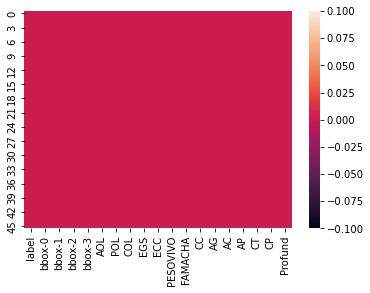

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum() #check for missing values

label       0
bbox-0      0
bbox-1      0
bbox-2      0
bbox-3      0
AOL         0
POL         0
COL         0
EGS         0
ECC         0
PESOVIVO    0
FAMACHA     0
CC          0
AG          0
AC          0
AP          0
CT          0
CP          0
Profund     0
dtype: int64

### Treinando o modelo

In [8]:
X = df.drop('PESOVIVO', axis=1)
y = df['PESOVIVO']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [11]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [12]:
importance = model.coef_

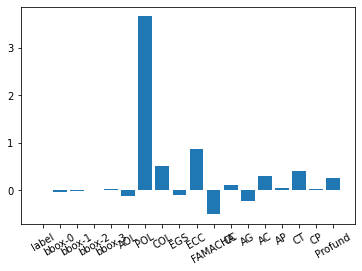

In [13]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

### Melhores valores para apurar o AOL

In [14]:
df = df.drop('AG', axis=1)
df = df.drop('AOL', axis=1)
df = df.drop('EGS', axis=1)
df = df.drop('FAMACHA', axis=1)

X = df.drop('PESOVIVO', axis=1)
y = df['PESOVIVO']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [16]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [17]:
importance = model.coef_

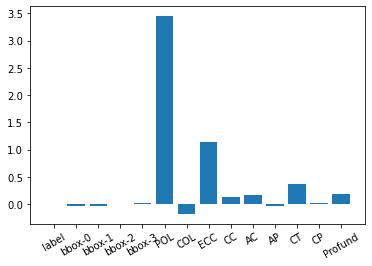

In [18]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

In [19]:
y_test_predict = model.predict(X_test)

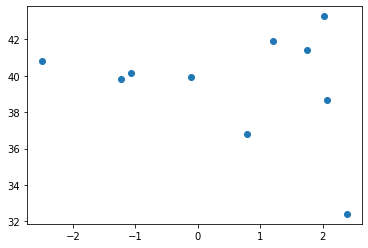

In [20]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

### Result

In [21]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 2.3374420996124896
R2 score for training is 0.7978796619332105


In [22]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 1.6772192490492919
R2 score for testing is 0.6765560958372965


In [23]:
print(model.intercept_)

-33.744062770402685


In [24]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
label,0.000000
bbox-0,-0.033622
bbox-1,-0.026936
bbox-2,0.011381
bbox-3,0.022119
POL,3.447723
COL,-0.179181
ECC,1.143604
CC,0.128979
AC,0.164521


In [25]:
y_pred = model.predict(X_test)

In [26]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
30,45.30,43.269787
10,37.60,36.815566
21,40.75,38.680403
34,39.80,39.914047
35,39.10,40.172434
40,38.30,40.793506
18,43.10,41.899083
3,34.80,32.415424
41,38.60,39.831107
7,43.20,41.443416


In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5137415066393003
Mean Squared Error: 2.8130644093814707
Root Mean Squared Error: 1.6772192490492919
